<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [ ]:
# Imports
import networkx as nx

In [4]:
import heapq
def kruskal(G):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0
    # Implement Kruskal algorithm her
    # Inicialización de variables
    parents = {}
    rank = {}
    ordered_list_by_weight = []
    
    # Para cada nodo, hacemos el Make_Set
    for node in G.nodes():
        make_set(parents, rank, node);
        
    # Ordenamos la lista de aristas por peso de forma cresciente
    ordered_list_by_weight = sorted([edge for edge in G.edges(data = True)], key = lambda i: i[2]['weight'])
    
    # Para cada nodo, buscamos el root del conjunto a que pertenence
    for edge in ordered_list_by_weight:
        u = findRoot(parents, edge[0])
        v = findRoot(parents, edge[1])
        # Si pertenences a conjuntos distintos, juntamos los conjuntos
        if u != v:
            union(parents, rank, u, v)
            # Añadimos la arista al MST tree
            tree.add_edge(u,v)
            total_weight += edge[2]['weight']
    return tree, total_weight

# Inicialización del rank y del parent de cada nodo
def make_set(parents, rank, node):
    parents[node] = node
    rank[node] = 0

# Función recursiva que busca el root de un conjunto
def findRoot(parents, node):
    if parents[node] == node:
        return node
    else: return findRoot(parents, parents[node])

# Hace la unión de los dos conjuntos, atualizando los roots y los ranks
def union(parents, rank, u, v):
    rootA = findRoot(parents, u)
    rootB = findRoot(parents, v)
    if rootA != rootB:
        if rank[rootA] > rank [rootB]:
            parents[rootB] = rootA
        else: parents[rootB] = rootA
        if rank[rootA] == rank[rootB]:
            rank[rootB] += 1


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [5]:
import heapq
def prim(G,origen=None,infinity=float('inf')):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0
    # Implement Prim algorithm here
    unvisited = []
    visited = set()
    parent = dict ()
    distance = dict()
    
    origen = origen if origen else rd.choice(list(G.nodes()))
    
    for node in G.nodes():
        # Para cada nodo, atualizamos el 'distance' y el 'parent'
        distance[node] = infinity
        parent[node] = None
        
    # Ponemos el 'cost' del primero nodo de la llista a 0
    distance[origen] = 0
    heapq.heappush(unvisited, (0,origen))
        
    while len(visited) < len(G):
        # Cogemos el nodo con menor 'cost'
        dist, current = heapq.heappop(unvisited)
        if current not in visited:
            if parent[current] != None:
                tree.add_edge(current, parent[current], weight= dist)
                total_weight += dist
            for neighbor in G.neighbors(current):
                if neighbor not in visited:
                    new_distance = G[current][neighbor]['weight']
                    # Para cada arista (v,z), miramos si el 'cost' del 2º nodo > 'weight' de la arista:
                    if (distance[neighbor] > new_distance):
                        # Caso sea mayor, atualizamos el 'cost' y el 'parent' del nodo
                        distance[neighbor] = new_distance
                        parent[neighbor] = current
                        heapq.heappush(unvisited, (new_distance, neighbor))
            visited.add(current)
    return tree, total_weight 

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


TOTAL MST WEIGHT
NX MST  20
Kruskal 20
Prim    20


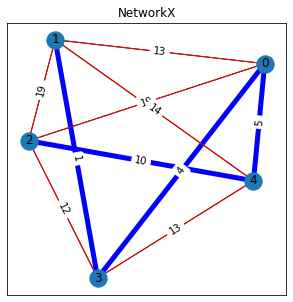

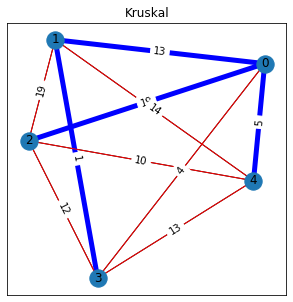

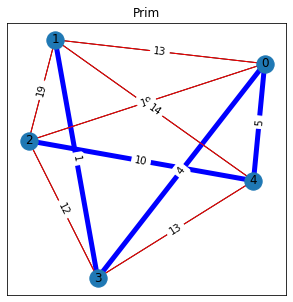

In [6]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

In [ ]:
'''El algoritmo de Kruskal consiste en ir juntando las aristas ordeandas por coste mínimo,
   desde que no se forme un ciclo.
   '''
'''El algoritmo de Prim consiste en encontrar el coste mínimo para llegar a cada vertice del grafo, 
   partiendo de un nodo del conjunto actual hasta que obtengamos el MST.'''

'''Para dense grafs(E ≃ V²), prim és más eficiente porque el cuesta menos ordenar 
   la estructura que contiene los nodos.'''
'''Para sparse grafs(E ≃ V), kruskal és más eficiente porque cuesta menos ordenar
   la estructura que contiene las aristas. '''

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

In [ ]:
'''La implementación del algoritmo está explicada en el código.'''

'''Complejidad Kruskal =
= O(1) + O(V) + O(E logE) + O(E LogV)
= O(E logE) + O(E logV)
= O(E logE)'''

'''Complejidad Prim =
= O(1) + O(V) + O(V + E logV) 
= O(E logV)'''

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>